In [25]:
import pandas as pd
from pathlib import Path
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
import numpy as np

In [26]:
filepath = Path("Downloads/Cleaned_Genre_Studio_Data.csv")
df = pd.read_csv(filepath)

In [27]:
df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18939 non-null  int64  
 1   uid         18939 non-null  int64  
 2   Name        18939 non-null  object 
 3   genre       18860 non-null  object 
 4   episodes    18411 non-null  float64
 5   members     18939 non-null  int64  
 6   popularity  18939 non-null  int64  
 7   ranked      15963 non-null  float64
 8   score       18596 non-null  float64
 9   Type        2815 non-null   object 
 10  Studio      2815 non-null   object 
 11  Start Date  18939 non-null  object 
 12  End Date    9696 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [29]:
df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [30]:
df.columns

Index(['Unnamed: 0', 'uid', 'Name', 'genre', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'Type', 'Studio', 'Start Date',
       'End Date'],
      dtype='object')

In [31]:
cols = [ 'Name','score','Type','Studio',]
df2 = df.loc[:,cols]

In [32]:
df2.head()

,Name,score,Type,Studio
0,Haikyuu!! Second Season,8.82,TV,Production I.G
1,Shigatsu wa Kimi no Uso,8.83,TV,A-1 Pictures
2,Made in Abyss,8.83,TV,Kinema Citrus
3,Fullmetal Alchemist: Brotherhood,9.23,TV,Bones
4,Kizumonogatari III: Reiketsu-hen,8.83,Movie,Shaft


In [33]:
mask = df2.Type == "TV"
mask2 = (df2.score >=8) & (df2.Type == "TV")
studio = df2.loc[mask2]

In [34]:
charts = studio.groupby("Studio")["score"].size().reset_index()

In [35]:
charts.head(15)

,Studio,score
0,8bit,2
1,A-1 Pictures,34
2,A.C.G.T.,4
3,Ajia-Do,2
4,Artland,8
5,Bandai Namco Pictures,10
6,Bee Train,4
7,Bones,42
8,Brain's Base,20
9,C-Station,2


In [36]:
animes = studio.groupby("Studio")["score"]

In [37]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Studio  67 non-null     object
 1   score   67 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [38]:
charts = charts.rename(columns = {"score":"anime"})

In [39]:
charts_sub = charts.sort_values(by = "anime", ascending = False).head(15).sort_values(by = "anime", ascending = True)

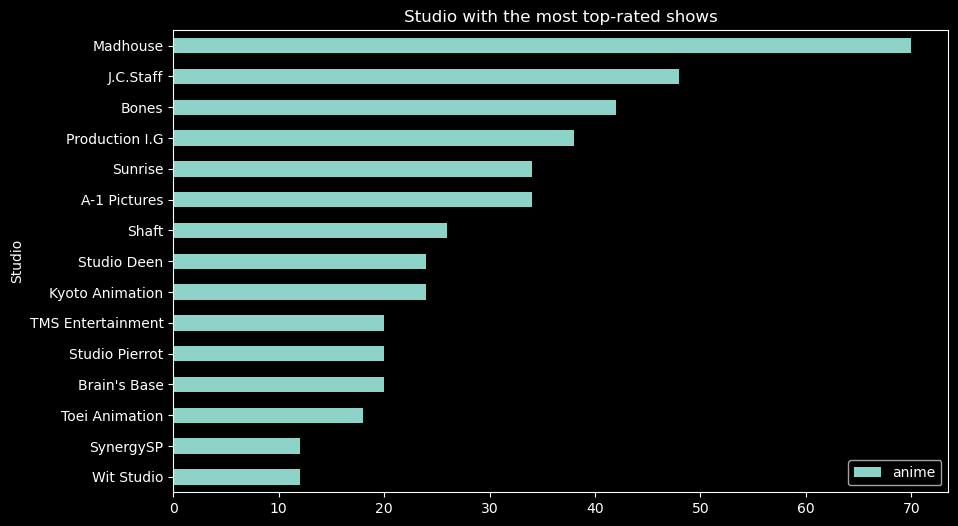

In [40]:
charts_sub.plot(kind = "barh", figsize =(10,6), x = "Studio", y ="anime")

plt.title("Studio with the most top-rated shows")
plt.show()

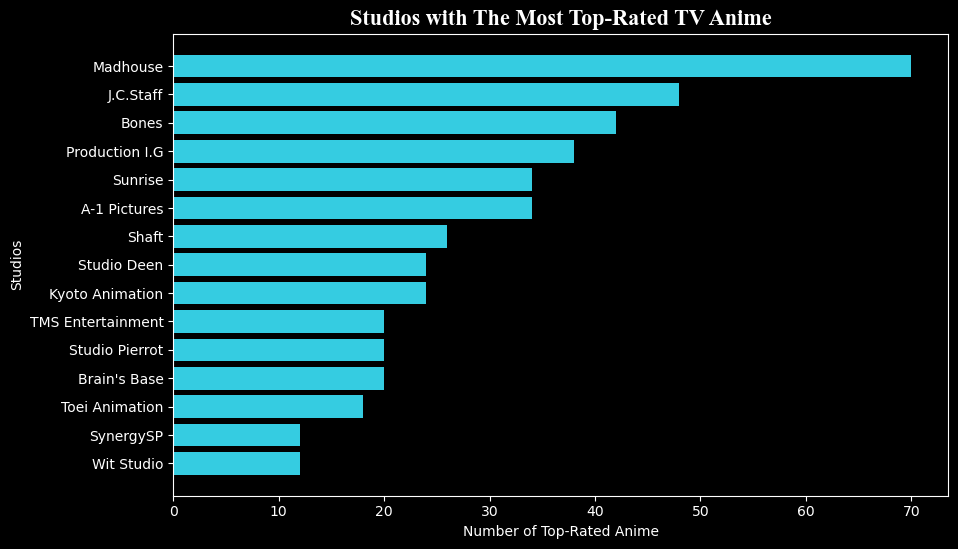

In [41]:
plt.figure(figsize = (10,6))
plt.style.use("dark_background")
plt.barh(charts_sub.Studio,charts_sub.anime,color = "#3ce3fb", alpha = 0.9)
plt.title("Studios with The Most Top-Rated TV Anime", fontsize =16, fontweight ="bold", fontfamily = "Times New Roman")
plt.xlabel("Number of Top-Rated Anime")
plt.ylabel("Studios")
plt.show()


In [42]:
dfgenre = df.loc[mask]

In [43]:
dfgenre.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,"Jan 7, 2019","Apr 1, 2019"


In [44]:
dfgenre["genre"].value_counts()

Action           544
Comedy           339
Slice of Life    174
Adventure        112
Drama             91
Mystery           60
Music             33
Sci-Fi            32
Game              19
Romance           12
Sports            11
Ecchi             10
Military           9
Demons             8
Psychological      8
Fantasy            8
Harem              6
Historical         4
Kids               3
Dementia           3
Horror             2
Cars               2
School             2
Space              2
Josei              2
Thriller           2
Martial Arts       1
Police             1
Shounen            1
Mecha              1
Name: genre, dtype: int64

In [45]:
dfmask = df2.loc[mask]

In [46]:
sub = dfgenre.loc[(dfmask.Studio.isin(["Madhouse", "Sunrise","J.C.Staff", "Toei Animation","A-1 Pictures"])) & (dfgenre.genre.isin(["Comedy","Slice of Life", "Action","Adventure","Mystery"]))]

sub2 = sub.groupby(["genre","Studio"] ).size().reset_index()

sub2.columns = ["Genre", "Studio", "Amount of Shows"]


<Axes: xlabel='Genre', ylabel='Amount of Shows'>

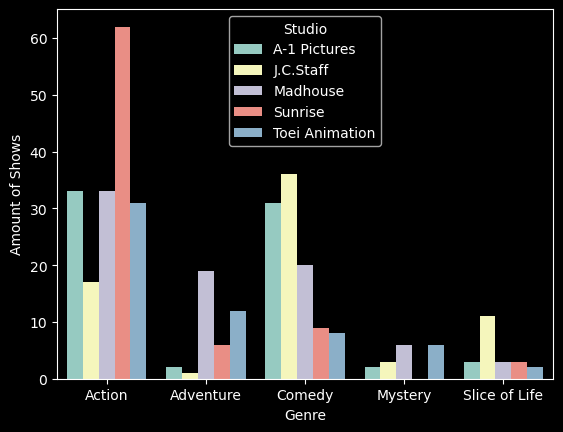

In [47]:

sns.barplot(data = sub2, x = "Genre", y = "Amount of Shows", hue = "Studio" )

In [48]:
df3 = dfmask.groupby("Studio")["score"].mean().reset_index()

In [49]:
df3.head()

,Studio,score
0,8bit,7.841250
1,A-1 Pictures,8.016351
2,A.C.G.T.,8.128000
3,AIC,7.536000
4,AIC ASTA,7.828750


In [50]:
df4 = dfmask.groupby("Studio")["Name"].size().reset_index()

In [51]:
df4.head(70)

,Studio,Name
0,8bit,12
1,A-1 Pictures,77
2,A.C.G.T.,5
3,AIC,5
4,AIC ASTA,8
5,AIC Classic,2
6,AIC Spirits,1
7,Actas,2
8,Ajia-Do,8
9,Arms,3


In [52]:
df5 = pd.merge(df3,df4, how = "left", on = ["Studio", "Studio"])

In [53]:
df5.head()

,Studio,score,Name
0,8bit,7.841250,12
1,A-1 Pictures,8.016351,77
2,A.C.G.T.,8.128000,5
3,AIC,7.536000,5
4,AIC ASTA,7.828750,8


In [54]:
df5 = df5.rename(columns = {"score":"Average_Score"})

In [55]:
df5 = df5.rename(columns = {"Name":"Amount_of_Anime"})

In [56]:
df5.head()

,Studio,Average_Score,Amount_of_Anime
0,8bit,7.841250,12
1,A-1 Pictures,8.016351,77
2,A.C.G.T.,8.128000,5
3,AIC,7.536000,5
4,AIC ASTA,7.828750,8


In [57]:
df_sub = df5.sort_values(by = "Amount_of_Anime", ascending = False).head(159).sort_values(by = "Amount_of_Anime", ascending = True)

C:\Users\otaku\AppData\Local\Temp\ipykernel_50452\1493521442.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, color="#3ce3fb", cmap = "seismic")


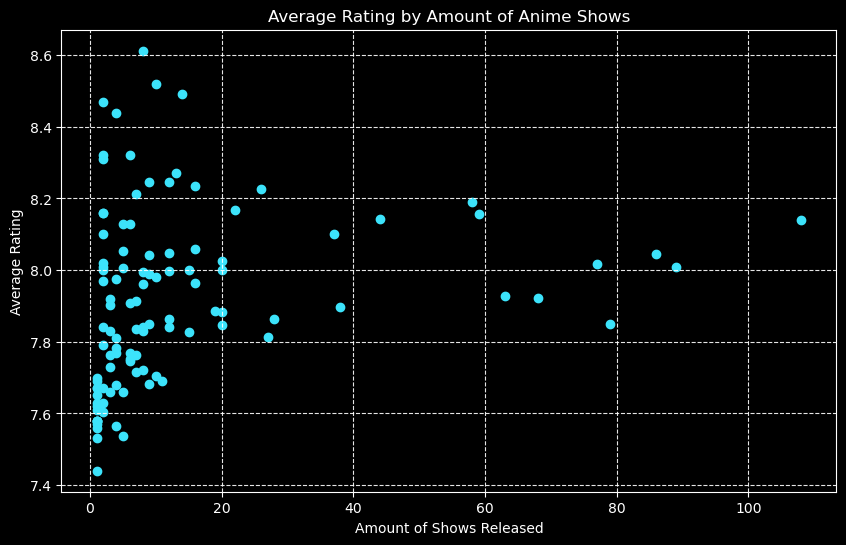

In [58]:
x = df_sub.Amount_of_Anime
y = df_sub.Average_Score
plt.figure(figsize = (10,6))
plt.scatter(x, y, color="#3ce3fb", cmap = "seismic")

plt.title("Average Rating by Amount of Anime Shows")
plt.grid(axis="both", color="white", linestyle="--", alpha=0.9)
plt.xlabel("Amount of Shows Released")
plt.ylabel("Average Rating")
plt.show()